In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [30]:
df = pd.read_csv('Social_Network_Ads.csv')

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [32]:
df.drop(['User ID'], axis=1, inplace=True)

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'EstimatedSalary'}>],
       [<Axes: title={'center': 'Purchased'}>, <Axes: >]], dtype=object)

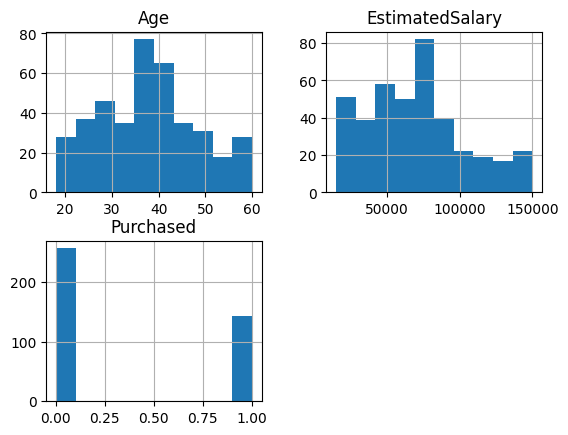

In [33]:
df.hist()

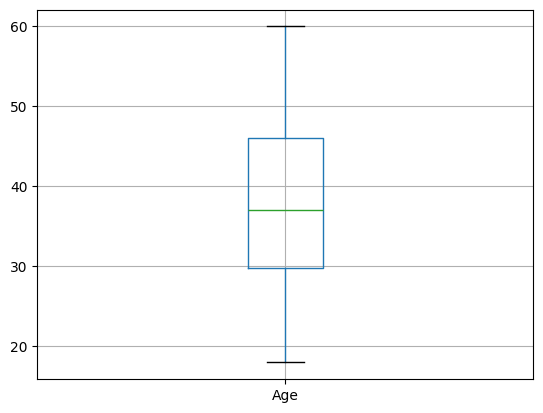

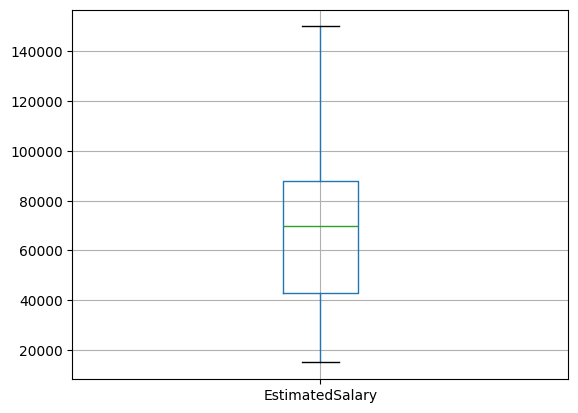

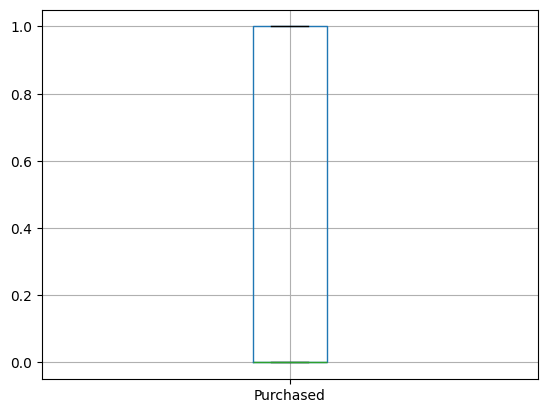

In [34]:
for col in df.columns:
    if df[col].dtype != 'object':
        df.boxplot(column=col)
        plt.show()

In [35]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [36]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

le = LabelEncoder()

df['Gender'] = le.fit_transform(df['Gender'])

sc = StandardScaler()

df[['Age', 'EstimatedSalary']] = sc.fit_transform(df[['Age', 'EstimatedSalary']])

In [37]:
df.corr()['Purchased'].sort_values(ascending=False)

Purchased          1.000000
Age                0.622454
EstimatedSalary    0.362083
Gender            -0.042469
Name: Purchased, dtype: float64

In [38]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,-1.781797,-1.490046,0
1,1,-0.253587,-1.460681,0
2,0,-1.113206,-0.785290,0
3,0,-1.017692,-0.374182,0
4,1,-1.781797,0.183751,0


In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE

X = df.drop(['Purchased'], axis=1)
y = df['Purchased']

smote = SMOTE()

X = df.drop(['Purchased'], axis=1)
y = df['Purchased']

X, y = smote.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=43)

lr = LogisticRegression()

lr.fit(X_train, y_train)

cv = cross_val_score(lr, X, y, cv=10)

y_pred = lr.predict(X_test)

Accuracy: 0.8372093023255814
Precision: 0.8095238095238095
Recall: 0.85
F1 Score: 0.8292682926829268
Cross Validation: 0.8325037707390649


<Axes: >

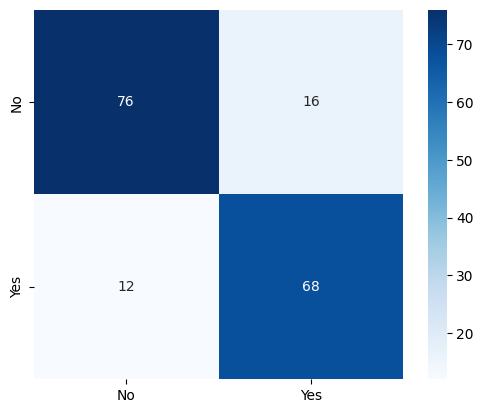

In [40]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

cm = confusion_matrix(y_test, y_pred)

print('Accuracy:', acc)
print('Precision:', prec)
print('Recall:', rec)
print('F1 Score:', f1)
print('Cross Validation:', cv.mean())

import seaborn as sns

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'], square=True)

k = 1 Accuracy: 0.8953488372093024
k = 2 Accuracy: 0.8895348837209303
k = 3 Accuracy: 0.936046511627907
k = 4 Accuracy: 0.9302325581395349
k = 5 Accuracy: 0.936046511627907
k = 6 Accuracy: 0.9244186046511628
k = 7 Accuracy: 0.9302325581395349
k = 8 Accuracy: 0.9244186046511628
k = 9 Accuracy: 0.9302325581395349
k = 10 Accuracy: 0.9302325581395349


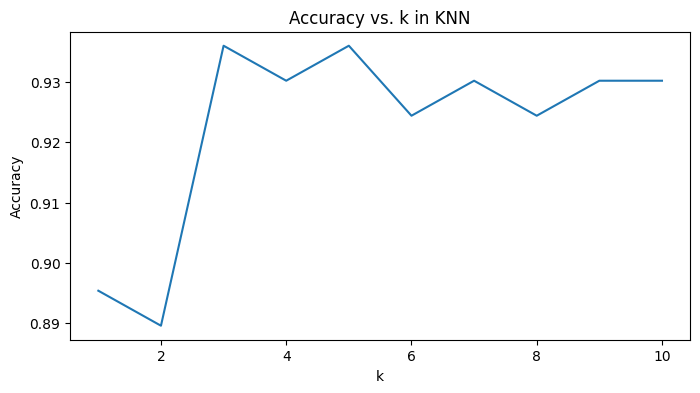

In [45]:
from sklearn.neighbors import KNeighborsClassifier

accuracy_values = []

for k in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_values.append(accuracy)
    print('k =', k, 'Accuracy:', accuracy)
    
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), accuracy_values)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. k in KNN')
plt.show()